In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/softserve-ds-hackathon-2020/submission.csv
/kaggle/input/softserve-ds-hackathon-2020/employees.csv
/kaggle/input/softserve-ds-hackathon-2020/history.csv


# Loading given datasets

In [2]:
import glob
from os import path


INPUT_DIR = '/kaggle/input/softserve-ds-hackathon-2020'
hist = pd.read_csv(path.join(INPUT_DIR, 'history.csv'), index_col='EmployeeID')
hist.head(3)

,Date,DevCenterID,SBUID,PositionID,PositionLevel,IsTrainee,LanguageLevelID,CustomerID,ProjectID,IsInternalProject,...,HourLockedReserve,OnSite,CompetenceGroupID,FunctionalOfficeID,PaymentTypeId,BonusOneTime,APM,WageGross,MonthOnPosition,MonthOnSalary
EmployeeID,,,,,,,,,,,,,,,,,,,,,
00116D71-E87D-4B64-A566-1F29B2A798A8,7/1/17,3,292,70,2,0,11,893EA22F-08BE-4F11-AD93-C50746E4565F,7F97465B-ED3C-45DB-BE96-86C7E493F0CD,0,...,0,0,15,1,9,0,39,0.887446,1,1
00116D71-E87D-4B64-A566-1F29B2A798A8,8/1/17,3,332,70,2,0,11,893EA22F-08BE-4F11-AD93-C50746E4565F,7F97465B-ED3C-45DB-BE96-86C7E493F0CD,0,...,0,0,15,1,9,200,28,0.887446,2,2
00116D71-E87D-4B64-A566-1F29B2A798A8,9/1/17,3,332,70,2,0,11,893EA22F-08BE-4F11-AD93-C50746E4565F,7F97465B-ED3C-45DB-BE96-86C7E493F0CD,0,...,0,0,15,1,9,0,43,0.887446,3,3


In [3]:
empl = pd.read_csv(path.join(INPUT_DIR, 'employees.csv'))
empl.head(3)

,EmployeeID,HiringDate,DismissalDate
0,01EDC1A7-5DA7-4939-854B-0002E0DF548D,9/1/18,NaN
1,91C351D9-38A1-40CB-9B69-000774211859,1/1/18,2/1/19
2,D699327D-8A78-4FBE-9CEA-001355717D3F,2/1/18,NaN


In [4]:
subm = pd.read_csv(path.join(INPUT_DIR, 'submission.csv'))
all_ids = set()
subm_ids = set(subm['EmployeeID'])
train_ids = set(empl[~empl['DismissalDate'].isnull()]['EmployeeID'])
print(f"Total number of employees: {empl.shape[0]}")
print(f'Number of employees for training: {len(train_ids)}')
print(f'Number of employees for evaluation: {len(subm_ids)}')

Total number of employees: 5373
Number of employees for training: 1017
Number of employees for evaluation: 4156


In [5]:
df = hist.join(empl.set_index('EmployeeID'), on='EmployeeID')
df.head(3)

,Date,DevCenterID,SBUID,PositionID,PositionLevel,IsTrainee,LanguageLevelID,CustomerID,ProjectID,IsInternalProject,...,CompetenceGroupID,FunctionalOfficeID,PaymentTypeId,BonusOneTime,APM,WageGross,MonthOnPosition,MonthOnSalary,HiringDate,DismissalDate
EmployeeID,,,,,,,,,,,,,,,,,,,,,
00116D71-E87D-4B64-A566-1F29B2A798A8,7/1/17,3,292,70,2,0,11,893EA22F-08BE-4F11-AD93-C50746E4565F,7F97465B-ED3C-45DB-BE96-86C7E493F0CD,0,...,15,1,9,0,39,0.887446,1,1,6/1/13,NaN
00116D71-E87D-4B64-A566-1F29B2A798A8,8/1/17,3,332,70,2,0,11,893EA22F-08BE-4F11-AD93-C50746E4565F,7F97465B-ED3C-45DB-BE96-86C7E493F0CD,0,...,15,1,9,200,28,0.887446,2,2,6/1/13,NaN
00116D71-E87D-4B64-A566-1F29B2A798A8,9/1/17,3,332,70,2,0,11,893EA22F-08BE-4F11-AD93-C50746E4565F,7F97465B-ED3C-45DB-BE96-86C7E493F0CD,0,...,15,1,9,0,43,0.887446,3,3,6/1/13,NaN


In [6]:
print('Number of missing values present in each column of the dataset')
pd.DataFrame(df.isnull().sum(axis=0)).T

Number of missing values present in each column of the dataset


,Date,DevCenterID,SBUID,PositionID,PositionLevel,IsTrainee,LanguageLevelID,CustomerID,ProjectID,IsInternalProject,...,CompetenceGroupID,FunctionalOfficeID,PaymentTypeId,BonusOneTime,APM,WageGross,MonthOnPosition,MonthOnSalary,HiringDate,DismissalDate
0,0,0,0,0,0,0,0,0,6017,0,...,0,0,0,0,0,0,0,0,0,75763


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 87766 entries, 00116D71-E87D-4B64-A566-1F29B2A798A8 to FFF3B179-1D20-40FF-A330-A051BDF37301
Data columns (total 25 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Date                87766 non-null  object 
 1   DevCenterID         87766 non-null  int64  
 2   SBUID               87766 non-null  int64  
 3   PositionID          87766 non-null  int64  
 4   PositionLevel       87766 non-null  int64  
 5   IsTrainee           87766 non-null  int64  
 6   LanguageLevelID     87766 non-null  int64  
 7   CustomerID          87766 non-null  object 
 8   ProjectID           81749 non-null  object 
 9   IsInternalProject   87766 non-null  int64  
 10  Utilization         87766 non-null  float64
 11  HourVacation        87766 non-null  int64  
 12  HourMobileReserve   87766 non-null  int64  
 13  HourLockedReserve   87766 non-null  int64  
 14  OnSite              87766 non-null  int64

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns


col_mapper = {
    'Date': 'CollectedOn',
    'SBUID': 'CompDepartmentID',
    'CustomerID': 'ClientID',
    'OnSite': 'WasOnSite',
    'Utilization': 'NonIntProjsPctLoad',
}
df = df.rename(col_mapper, axis=1)
dates = ['CollectedOn', 'HiringDate', 'DismissalDate']
# fixing datetypes of dates
for date_col in dates:
    df[date_col] = pd.to_datetime(df[date_col], format='%d/%m/%y')

Examining categorial features


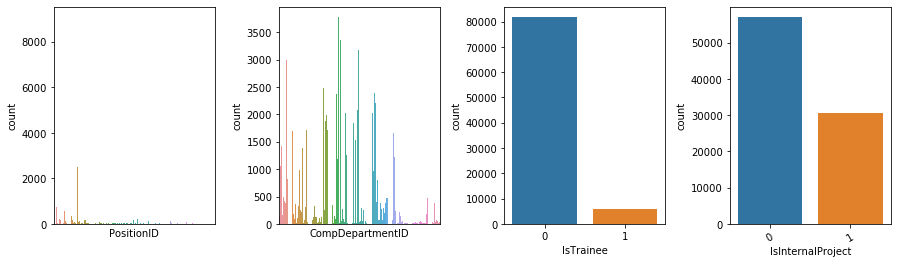

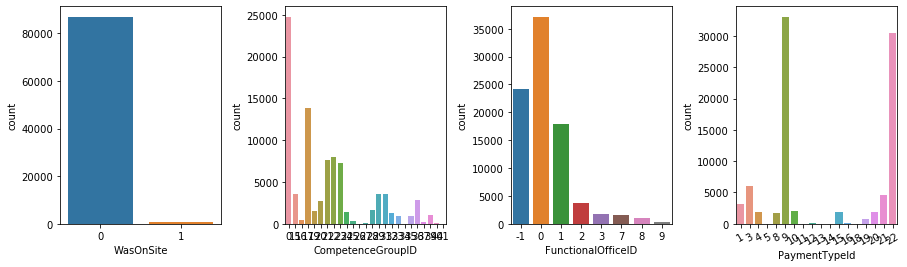

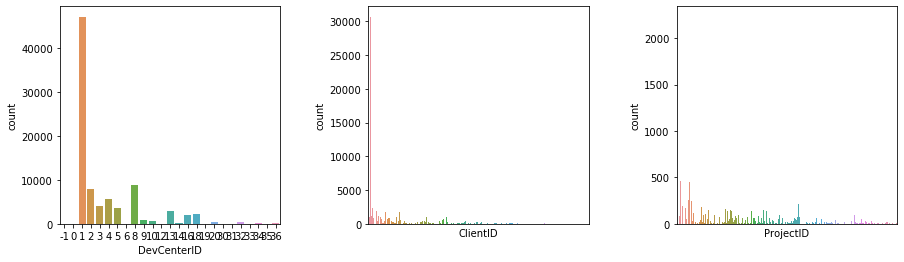

In [9]:
def plot(data, plot_type='countplot', tick_control=True, target=None, *args, **kwargs):
    n = len(data.columns)
    n -= 1 if target else 0
    per_line = 4
    plot_func = sns.countplot if plot_type == 'countplot' else sns.boxplot if plot_type == 'boxplot' else sns.distplot
    for i in range(0, n, per_line):
        n_plots = per_line if n - i >= per_line else n % per_line
        fig, axes = plt.subplots(1, n_plots)
        plt.subplots_adjust(wspace=0.4)
        plt.xticks(rotation=30)
        fig.set_figwidth(15)
        fig.set_figheight(4)
        for j in range(n_plots):
            if data.columns[i + j] == target:
                continue
            current_ax = axes[j] if hasattr(axes, 'shape') else axes
            if target:
                plot_func(x=target, y=data.columns[i + j], data=data, ax=current_ax, *args, **kwargs)
            else:
                plot_func(x=data.columns[i + j], hue=target, data=data, ax=current_ax, *args, **kwargs)
                
            if tick_control and data[data.columns[i + j]].unique().shape[0] > 50:
                current_ax.tick_params(axis='x',          
                                    which='both',      
                                    bottom=False,      
                                    top=False,         
                                    labelbottom=False) 
            
        plt.show()
        

cat_feats = ['PositionID', 'CompDepartmentID', 'IsTrainee', 'IsInternalProject', 'WasOnSite', 'CompetenceGroupID', 
             'FunctionalOfficeID', 'PaymentTypeId', 'DevCenterID', 'ClientID', 'ProjectID']

print('Examining categorial features')
plot(df[cat_feats], 'countplot')

## Inference
<ol>
    <li>*IsTrainee* and *OnSite* boolean features contain mostly one kind of value, so they will not help in predicting the target value</li>
    <li>There are lots of positions and each has low frequency, so we may drop *PositionID* column. The same goes for *PaymentTypeID*, *DevCenterID*, *ClientID* and *ProjectID* columns. As for *CompDepartmentID* and *CompetenceGroupID*, we may take top N most popular values and label others as 'other'. *FunctionalOfficeID* feature may have all unique values encoded.  </li>
</ol>

In [10]:
remove_cols = ['IsTrainee', 'WasOnSite', 'PositionID', 'PaymentTypeId', 'DevCenterID', 'ClientID', 'ProjectID']
df = df.drop(remove_cols, axis=1)
for c in remove_cols:
    cat_feats.remove(c)

In [11]:
def prepr_empl_hist_data(empl_id, mean_cols, max_cols, freq_cols, dates, data, label_data=True, window_size=3):
    empl_data = data.loc[empl_id].sort_values(dates)
#     static_cols = empl_data.drop(list(mean_cols + max_cols), axis=1).columns
    result = []
    targets = []
    
    if label_data:
        dism_date = str(empl_data['DismissalDate'][0])
        empl_data = empl_data[empl_data['CollectedOn'] < dism_date]
        N = empl_data.shape[0] 
        for i in range(window_size, N, 3):
            prev_data = empl_data.iloc[i-window_size:i]
            prev_data = ([prev_data[mean_cols].mean(axis=0).values, 
                         prev_data[max_cols].max(axis=0).values] + 
                         [prev_data[fc].value_counts().index[0] for fc in freq_cols])
            result.append(np.hstack(prev_data))
            targets.append(0 if i + 3 < N else 1)
        
        index = pd.Series([empl_id] * len(targets), dtype=np.object)
    else:
        prev_data = empl_data.iloc[-window_size:]
        prev_data = ([prev_data[mean_cols].mean(axis=0).values, 
                     prev_data[max_cols].max(axis=0).values] + 
                     [prev_data[fc].value_counts().index[0] for fc in freq_cols])
        result.append(np.hstack(prev_data))
        index = pd.Series([empl_id], dtype=np.object)

    return pd.DataFrame(result, columns=mean_cols + max_cols + freq_cols, index=index), np.asarray(targets)

mean_cols = ['PositionLevel', 'LanguageLevelID', 'NonIntProjsPctLoad', 'HourVacation', 
             'HourMobileReserve', 'HourLockedReserve', 
             'BonusOneTime', 'APM', 'WageGross']
max_cols = ['MonthOnPosition', 'MonthOnSalary']
freq_cols = ['FunctionalOfficeID', 'CompDepartmentID', 'CompetenceGroupID', 'IsInternalProject']

cleaned_df = []
y = []

for emp_id in iter(train_ids):
    prepr_data, targets = prepr_empl_hist_data(emp_id, mean_cols, max_cols, freq_cols, dates, df, label_data=True)
    if prepr_data.shape[0] != 0:
        cleaned_df.append(prepr_data)
        y.extend(targets)

cleaned_df = pd.concat(cleaned_df)
cleaned_df['DismissalRisk'] = y 

eval_examples = []
for emp_id in iter(subm_ids):
    prepr_data, _ = prepr_empl_hist_data(emp_id, mean_cols, max_cols, freq_cols, dates, df, label_data=False)
    eval_examples.append(prepr_data)
    
eval_df = pd.concat(eval_examples)
print(f'Examples for train/test: {cleaned_df.shape[0]}')
print(f'Examples for evaluation: {eval_df.shape[0]}')

Examples for train/test: 2989
Examples for evaluation: 4156


Examining continuous features after calculating moving average of them


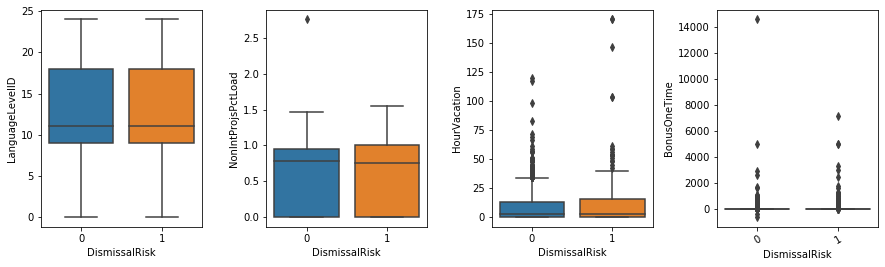

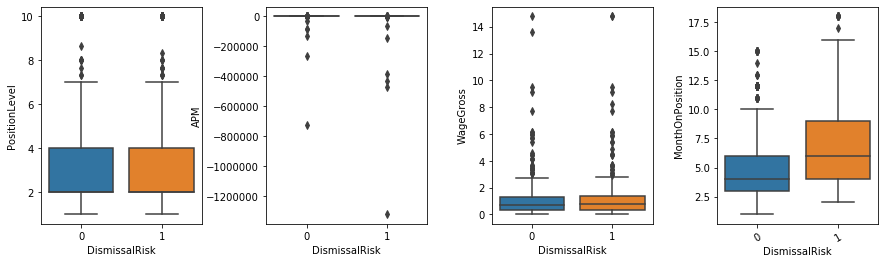

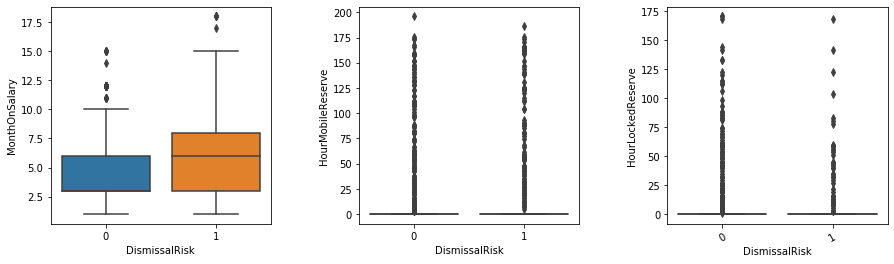

,LanguageLevelID,NonIntProjsPctLoad,HourVacation,BonusOneTime,PositionLevel,APM,WageGross,MonthOnPosition,MonthOnSalary,HourMobileReserve,HourLockedReserve
count,2989.000000,2989.000000,2989.000000,2989.000000,2989.000000,2.989000e+03,2989.000000,2989.000000,2989.000000,2989.000000,2989.000000
mean,10.930858,0.549789,9.260622,59.876547,3.588491,-1.368917e+03,0.921698,5.862496,5.029107,6.282034,2.697446
std,6.655427,0.445206,13.195677,380.542170,3.047779,3.138082e+04,0.980255,3.280428,2.777592,25.270029,14.226915
min,0.000000,0.000000,0.000000,-637.000000,1.000000,-1.317766e+06,0.028084,1.000000,1.000000,0.000000,0.000000
25%,9.000000,0.000000,0.000000,0.000000,2.000000,0.000000e+00,0.321278,3.000000,3.000000,0.000000,0.000000
50%,11.000000,0.778500,2.666667,0.000000,2.000000,1.833333e+01,0.740344,6.000000,4.000000,0.000000,0.000000
75%,18.000000,0.969700,16.000000,0.000000,4.000000,4.133333e+01,1.342403,8.000000,6.000000,0.000000,0.000000
max,24.000000,2.757600,170.666667,14583.000000,10.000000,1.000000e+02,14.772218,18.000000,18.000000,196.000000,170.666667


In [12]:
continuous_feats = ['LanguageLevelID', 'NonIntProjsPctLoad', 'HourVacation', 'BonusOneTime', 'PositionLevel',
                    'APM', 'WageGross', 'MonthOnPosition', 'MonthOnSalary', 'HourMobileReserve', 'HourLockedReserve']
print('Examining continuous features after calculating moving average of them')
plot(cleaned_df[continuous_feats + ['DismissalRisk']], 'boxplot', tick_control=False, target='DismissalRisk')
cleaned_df[continuous_feats].describe()

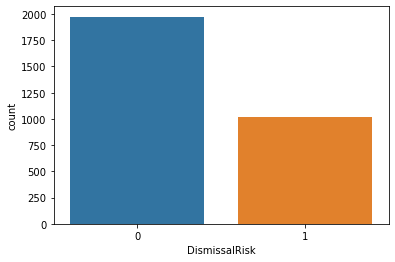

In [13]:
sns.countplot(cleaned_df['DismissalRisk']);

## Created dataset is unbalanced, we may use oversampling or balanced weights.

,PositionLevel,LanguageLevelID,NonIntProjsPctLoad,HourVacation,HourMobileReserve,HourLockedReserve,BonusOneTime,APM,WageGross,MonthOnPosition,MonthOnSalary,FunctionalOfficeID,CompDepartmentID,CompetenceGroupID,IsInternalProject,DismissalRisk
PositionLevel,1.000000,-0.355120,-0.511106,-0.276395,-0.097592,-0.063551,0.046256,-0.079721,-0.046508,-0.002537,0.149113,-0.201658,-0.410903,-0.457052,0.506364,0.017700
LanguageLevelID,-0.355120,1.000000,0.308200,0.203205,0.047798,0.077934,-0.031901,0.019371,0.073629,0.004383,-0.027138,0.321901,0.398503,0.421684,-0.348961,-0.025673
NonIntProjsPctLoad,-0.511106,0.308200,1.000000,0.154537,-0.180420,-0.101302,-0.024990,-0.017572,0.144522,0.044357,-0.037652,0.204916,0.606425,0.548102,-0.854638,-0.009212
HourVacation,-0.276395,0.203205,0.154537,1.000000,0.062032,0.013120,-0.030514,0.023741,0.026945,-0.032291,-0.082414,0.094581,0.212605,0.174995,-0.225584,0.007093
HourMobileReserve,-0.097592,0.047798,-0.180420,0.062032,1.000000,0.053498,-0.031311,0.010940,0.010117,0.016034,0.038768,0.089429,0.120518,0.099493,0.048846,0.055375
HourLockedReserve,-0.063551,0.077934,-0.101302,0.013120,0.053498,1.000000,-0.015477,0.001628,0.017592,-0.041542,-0.018751,0.008472,0.090207,0.099067,-0.054769,-0.038999
BonusOneTime,0.046256,-0.031901,-0.024990,-0.030514,-0.031311,-0.015477,1.000000,-0.065498,0.460630,-0.001718,-0.002711,-0.027829,-0.025146,-0.056088,0.036740,0.014310
APM,-0.079721,0.019371,-0.017572,0.023741,0.010940,0.001628,-0.065498,1.000000,-0.015957,0.027141,0.021834,0.028838,0.043818,0.046053,0.031445,-0.031765
WageGross,-0.046508,0.073629,0.144522,0.026945,0.010117,0.017592,0.460630,-0.015957,1.000000,0.021703,0.064756,0.165386,0.140467,0.128989,-0.165326,0.034324
MonthOnPosition,-0.002537,0.004383,0.044357,-0.032291,0.016034,-0.041542,-0.001718,0.027141,0.021703,1.000000,0.703635,-0.015193,-0.053473,-0.060771,-0.011348,0.288321


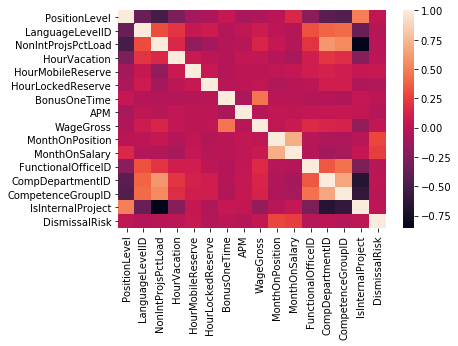

In [14]:
corr = cleaned_df.corr()
sns.heatmap(corr);
corr

## *MonthOnPosition* and *MonthOnSalary* features have good correlation with target variable.

## Encoding categorial variables

In [15]:
from sklearn.preprocessing import MultiLabelBinarizer


tops = [30, 10, 9999]
enc_cols = ['CompDepartmentID', 'CompetenceGroupID', 'FunctionalOfficeID']
def encode_cat_features(data, tops):
    enc_cat_feats = []    
    encoders = []
    allowed_values = []
    for i in range(data.columns.shape[0]):
        top_n = tops[i]
        col = data.columns[i]
        selected_vals = set(data[col].value_counts().index[:top_n])
        allowed_values.append(selected_vals)
        prepr_col = data[col].apply(lambda x: x if x in selected_vals else 9999)
        
        dummy_encoder = MultiLabelBinarizer()
        enc_col = dummy_encoder.fit_transform(prepr_col.to_numpy().astype(np.float32).reshape(-1, 1))
        enc_cat_feats.append(enc_col)
        
        dummy_encoder.categories_ = list(map(lambda x: f'{col}_{str(x)}', dummy_encoder.classes_))
        encoders.append(dummy_encoder)
    return np.hstack(enc_cat_feats), encoders, allowed_values

enc_cat_feats, encoders, allowed_values = encode_cat_features(cleaned_df[enc_cols], tops)
print(enc_cat_feats.shape)
cleaned_df.drop(enc_cols, axis=1, inplace=True)
dummy_feat_cols = []
for enc in encoders:
    dummy_feat_cols.extend(enc.categories_)
dummy_features_df = pd.DataFrame(enc_cat_feats, columns=dummy_feat_cols, index=cleaned_df.index)
dummy_features_df.head(2)

(2989, 50)


,CompDepartmentID_29.0,CompDepartmentID_47.0,CompDepartmentID_120.0,CompDepartmentID_138.0,CompDepartmentID_255.0,CompDepartmentID_266.0,CompDepartmentID_268.0,CompDepartmentID_269.0,CompDepartmentID_271.0,CompDepartmentID_272.0,...,CompetenceGroupID_36.0,CompetenceGroupID_9999.0,FunctionalOfficeID_-1.0,FunctionalOfficeID_0.0,FunctionalOfficeID_1.0,FunctionalOfficeID_2.0,FunctionalOfficeID_3.0,FunctionalOfficeID_7.0,FunctionalOfficeID_8.0,FunctionalOfficeID_9.0
B3610602-AC73-4CDF-9692-312BA2B4F3D8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
B3610602-AC73-4CDF-9692-312BA2B4F3D8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


## Feature selection based on p-values

In [16]:
import statsmodels.api as sm


data = pd.concat((cleaned_df, dummy_features_df), axis=1)
selected_columns = data.columns
def backwardElimination(x, Y, sl, columns):
    numVars = len(x[0])
    for i in range(0, numVars):
        regressor_OLS = sm.OLS(Y, x).fit()
        maxVar = max(regressor_OLS.pvalues).astype(float)
        if maxVar > sl:
            for j in range(0, numVars - i):
                if (regressor_OLS.pvalues[j].astype(float) == maxVar):
                    x = np.delete(x, j, 1)
                    columns = np.delete(columns, j)
                    
    print(regressor_OLS.summary())
    return x, columns

SL = 0.05
data_modeled, selected_columns = backwardElimination(data.drop(['DismissalRisk'], axis=1).values, data['DismissalRisk'].values, SL, selected_columns)
selected_columns

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.405
Model:                            OLS   Adj. R-squared (uncentered):              0.404
Method:                 Least Squares   F-statistic:                              254.0
Date:                Tue, 19 May 2020   Prob (F-statistic):                        0.00
Time:                        14:37:36   Log-Likelihood:                         -1850.4
No. Observations:                2989   AIC:                                      3717.
Df Residuals:                    2981   BIC:                                      3765.
Df Model:                           8                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

Index(['PositionLevel', 'HourMobileReserve', 'APM', 'MonthOnPosition',
       'MonthOnSalary', 'CompDepartmentID_29.0', 'CompDepartmentID_309.0',
       'CompDepartmentID_334.0', 'FunctionalOfficeID_9.0'],
      dtype='object')

In [17]:
from sklearn.utils import shuffle

X, y = data[selected_columns], data['DismissalRisk']
X, y = shuffle(X, y)

In [18]:
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.decomposition import PCA
from sklearn.metrics import fbeta_score, make_scorer
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
import xgboost as xgb


SCORER = make_scorer(fbeta_score, beta=1.7)
ens_algs_names = ['RandomForestClassifier', 'sklearn.GradientBoostingClassifier']
ens_algs = [RandomForestClassifier, GradientBoostingClassifier]
for i, cls in enumerate(ens_algs):
    try:
        model = cls(n_estimators=10, class_weight='balanced')
    except TypeError:
        model = cls(n_estimators=10)
        
    scores = cross_val_score(model, X, y, scoring=SCORER, cv=10, n_jobs=-1, error_score='raise')
    print(f"{ens_algs_names[i]} scores: {', '.join(map(str, scores))}. Mean: {scores.mean()}.\n")

model = xgb.XGBClassifier(n_estimators=10, learning_rate=.1, class_weight='balanced')
scores = cross_val_score(model, X, y, scoring=SCORER, cv=10, n_jobs=-1, error_score='raise')
print(f"XGBClassifier scores: {', '.join(map(str, scores))}. Mean: {scores.mean()}.")


RandomForestClassifier scores: 0.3670899727682062, 0.4229525129794232, 0.4391556617396099, 0.34907229011058616, 0.41595804267019704, 0.45375602675099797, 0.3984190346131624, 0.41342215770646484, 0.3519107407204342, 0.4257425742574258. Mean: 0.40374790143165074.

sklearn.GradientBoostingClassifier scores: 0.08960479120734477, 0.11558651655716597, 0.10240547566553686, 0.113341318916119, 0.13857762808472052, 0.1268009648608123, 0.12638897914094482, 0.11338169570568045, 0.18595831474281346, 0.18708519029144888. Mean: 0.12991308751725872.

XGBClassifier scores: 0.23946566530210225, 0.3409290096406661, 0.25299637647496054, 0.22957301779338432, 0.22480077863617012, 0.2913595781652586, 0.31139573446166163, 0.30820470684899354, 0.34754899041038784, 0.321402224910738. Mean: 0.28676760826443226.


In [19]:
scaler = RobustScaler()
X_scaled = scaler.fit_transform(X)
print(X_scaled.shape)
decomp = PCA(.99)
X_scaled_decomp = decomp.fit_transform(X_scaled)
X_scaled_decomp.shape

(2989, 9)


(2989, 1)

In [21]:
from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold


SCORER = make_scorer(fbeta_score, beta=1.7)
CV = StratifiedKFold(7, shuffle=True)
lin_algs_names = ['LogisticRegression', 'RidgeClassifier', 'SVC']
lin_algs = [LogisticRegression, RidgeClassifier]
for i, cls in enumerate(lin_algs):
    try:
        model = cls(class_weight='balanced')
    except TypeError:
        model = cls()
        
    scores = cross_val_score(model, X_scaled, y, scoring=SCORER, cv=CV, n_jobs=-1, error_score='raise')
    print(f"\n{lin_algs_names[i]} scores: {', '.join(map(str, scores))}. Mean: {scores.mean()}.")

svm_params = ['rbf', 'sigmoid']
for i in range(len(svm_params)):
    model = SVC(kernel=svm_params[i], class_weight='balanced', decision_function_shape='ovo')
    scores = cross_val_score(model, X_scaled, y, scoring=SCORER, cv=CV, n_jobs=-1, error_score='raise')
#     scores = cross_val_score(model, X_scaled, y, scoring=SCORER, cv=7, n_jobs=-1, error_score='raise')
    print(f"\nSVM with {svm_params[i]} kernel scores: {', '.join(map(str, scores))}. Mean: {scores.mean()}.")


LogisticRegression scores: 0.5334779967016751, 0.5203164505342143, 0.5164986476518318, 0.5025572958145298, 0.5668369483292857, 0.543182730117968, 0.5177373944202712. Mean: 0.5286582090813966.

RidgeClassifier scores: 0.5252713443295446, 0.5217044393514981, 0.5073471872011129, 0.5145048937483467, 0.4547252944879057, 0.4290570472832475, 0.4981492851504254. Mean: 0.4929656416502972.

SVM with rbf kernel scores: 0.018007175095475066, 0.07919918561248729, 0.0364360145182063, 0.062446967090929936, 0.0630251128341627, 0.03652153503109963, 0.08010525111543303. Mean: 0.053677320185399134.

SVM with sigmoid kernel scores: 0.01830372897306199, 0.03652153503109963, 0.04522729915126148, 0.04565191878887455, 0.0, 0.07186237155062924, 0.027585391797659856. Mean: 0.03502174932751239.


In [22]:
from sklearn.neighbors import KNeighborsClassifier


model = KNeighborsClassifier()
scores = cross_val_score(model, X_scaled_decomp, y, scoring=SCORER, cv=CV, n_jobs=-1, error_score='raise')
print(f"KNN scores: {', '.join(map(str, scores))}. Mean: {scores.mean()}.")

KNN scores: 0.24695962702112884, 0.32975628552162606, 0.2509424453180123, 0.23152465033230826, 0.23244696743352256, 0.2799356121579396, 0.19051117232935416. Mean: 0.2517252514448417.


In [23]:
from sklearn.neural_network import MLPClassifier

model = MLPClassifier(hidden_layer_sizes=(9, ), activation='logistic',)
scores = cross_val_score(model, X_scaled, y, scoring=SCORER, cv=CV, n_jobs=-1, error_score='raise')
print(f"MLP scores: {', '.join(map(str, scores))}. Mean: {scores.mean()}.")

MLP scores: 0.37232461052845944, 0.30399759543131943, 0.3060138701997723, 0.30350066728261993, 0.2967322956396248, 0.2961217981689127, 0.27608809101346415. Mean: 0.30782556118059606.


In [24]:
selected_columns, selected_columns.shape[0]

(Index(['PositionLevel', 'HourMobileReserve', 'APM', 'MonthOnPosition',
        'MonthOnSalary', 'CompDepartmentID_29.0', 'CompDepartmentID_309.0',
        'CompDepartmentID_334.0', 'FunctionalOfficeID_9.0'],
       dtype='object'),
 9)

In [25]:
import tensorflow as tf
import tensorflow.keras as keras
import tensorflow.keras.layers as layers
print(tf.executing_eagerly())


def fbeta(y_true, y_pred):
#     print(y_true[:10])
#     print(y_pred[:10])
#     print(y_pred.numpy().round()[:10])
    return fbeta_score(y_true=y_true.numpy(), y_pred=y_pred.numpy().round(), beta=1.7)

model = keras.Sequential(
    [
        layers.Dense(8, activation='sigmoid'),
        layers.Dense(1, activation='sigmoid'),
    ]
)
opt = keras.optimizers.Adam(.001)
model.compile(opt, loss='binary_crossentropy', metrics=[fbeta, 'accuracy'], run_eagerly=True)
model.fit(X_scaled, y.values, batch_size=16, epochs=5, class_weight={0:1, 1:5});

True
Train on 2989 samples
Epoch 1/5
2989/2989 [==============================] - 3s 845us/sample - loss: 1.3695 - fbeta: 0.6440 - accuracy: 0.3396
Epoch 2/5
2989/2989 [==============================] - 2s 756us/sample - loss: 1.3446 - fbeta: 0.6470 - accuracy: 0.3396
Epoch 3/5
2989/2989 [==============================] - 2s 766us/sample - loss: 1.3320 - fbeta: 0.6451 - accuracy: 0.3396
Epoch 4/5
2989/2989 [==============================] - 2s 770us/sample - loss: 1.3251 - fbeta: 0.6437 - accuracy: 0.3396
Epoch 5/5
2989/2989 [==============================] - 3s 860us/sample - loss: 1.3211 - fbeta: 0.6436 - accuracy: 0.3396


In [ ]:
params = {
    'penalty': ['l2'],
    'C': np.linspace(0, .5, 20),
    'class_weight': ['balanced'],
    'warm_start': [True, False],
    'max_iter': [4000],
    'solver': ['newton-cg', 'lbfgs', 'sag', 'liblinear']
}
clf = LogisticRegression()
optimizer = GridSearchCV(clf, params, scoring=SCORER, n_jobs=-1, cv=CV, return_train_score=True)
optimizer.fit(X, y)

print(f'Best score with l2 penalty: {optimizer.best_score_}')
print(optimizer.best_params_)
estim1 = optimizer.best_estimator_

params = {
    'penalty': ['l1'],
    'C': np.linspace(0, 1, 20),
    'class_weight': ['balanced'],
    'warm_start': [True, False],
    'max_iter': [5000],
    'solver': ['liblinear', 'saga']
}
optimizer = GridSearchCV(clf, params, scoring=SCORER, n_jobs=-1, cv=CV, return_train_score=True)
optimizer.fit(X, y)

print(f'Best score with l1 penalty: {optimizer.best_score_}')
print(optimizer.best_params_)
estim2 = optimizer.best_estimator_


params = {
    'penalty': ['elasticnet'],
    'l1_ratio': np.linspace(.5, 1, 20),
    'class_weight': ['balanced'],
    'warm_start': [True, False],
    'max_iter': [5000],
    'solver': ['saga']
}
optimizer = GridSearchCV(clf, params, scoring=SCORER, n_jobs=-1, cv=CV, return_train_score=True)
optimizer.fit(X, y)

print(f'Best score with elasticnet penalty: {optimizer.best_score_}')
print(optimizer.best_params_)
estim3 = optimizer.best_estimator_

In [ ]:
dummy_features = []
for i in range(len(enc_cols)):
    col = enc_cols[i]
    prepr_col = eval_df[col].apply(lambda x: x if x in allowed_values[i] else 9999)
    dummy_features.append(encoders[i].transform(prepr_col.to_numpy().astype(np.float64).reshape(-1, 1)))

dummy_features_df = pd.DataFrame(np.hstack(dummy_features), columns=dummy_feat_cols, index=eval_df.index)

In [ ]:
X_test = scaler.transform(pd.concat((eval_df, dummy_features_df), axis=1)[selected_columns].values)
stack = [estim1]
# stack = [estim1, estim2, estim3]
preds = []
for estim in stack:
    preds.append(estim.predict(X_test))
preds = np.array(preds)
preds.shape
preds = np.mean(preds, axis=0).round()

In [ ]:
eval_df['EmployeeID'] = eval_df.index
subm = eval_df[['EmployeeID']]
subm['target'] = preds.astype(np.int64)
subm.to_csv('submission.csv', index=False)
subm